In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#データの読み込み
anime = pd.read_csv("./data/knn.csv",index_col=0)
anime

,Space,Battle,Friendship,Magic,Group
0,5,7,1,1,0
1,5,6,4,1,0
2,9,10,1,0,0
3,14,9,3,1,0
4,10,7,1,1,0
...,...,...,...,...,...
276,18,6,5,4,2
277,21,6,11,13,1
278,7,9,11,5,2
279,21,3,15,9,2


In [2]:
X = anime.drop(['Group'], axis=1).values   # 説明変数
Y = anime['Group'].values   # 目的変数

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [5]:
# 予測実行
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2,
       1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [6]:
from sklearn import metrics

metrics.accuracy_score(Y_test, y_pred)

0.6470588235294118

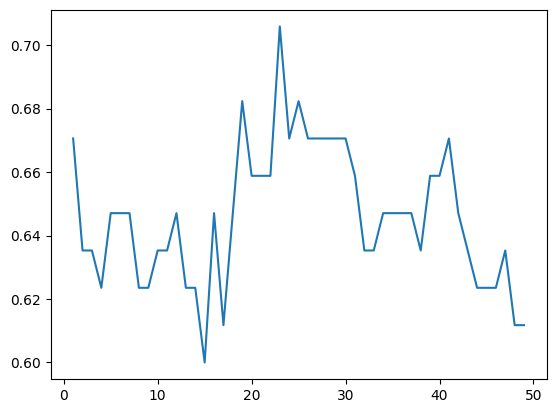

In [7]:
k_range = []
accuracy = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k) # インスタンス生成
    knn.fit(X_train, Y_train)                 # モデル作成実行
    y_pred = knn.predict(X_test)              # 予測実行
    accuracy.append(metrics.accuracy_score(Y_test, y_pred)) # 精度格納
    k_range.append(k)

plt.plot(k_range, accuracy)

In [8]:
test_df = pd.DataFrame(
    X_test,
   # columns = anime
)

test_df["Group"] = Y_test
test_df["pred_Group"] = y_pred

test_df.head()

,0,1,2,3,Group,pred_Group
0,6,8,4,5,1,0
1,15,3,1,1,0,0
2,6,6,10,7,2,1
3,23,3,7,8,2,1
4,10,9,3,0,0,0


Text(0.5, 1.0, 'prediction Group')

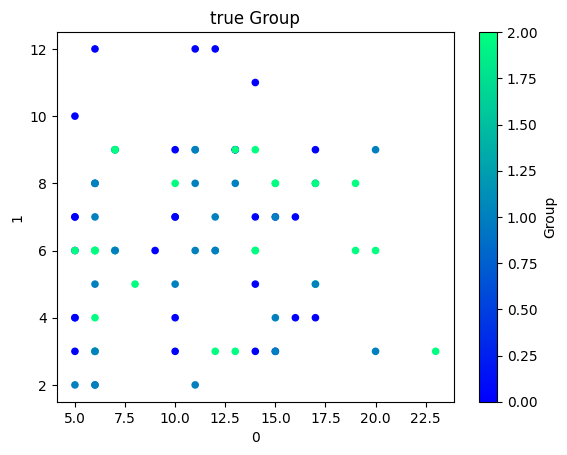

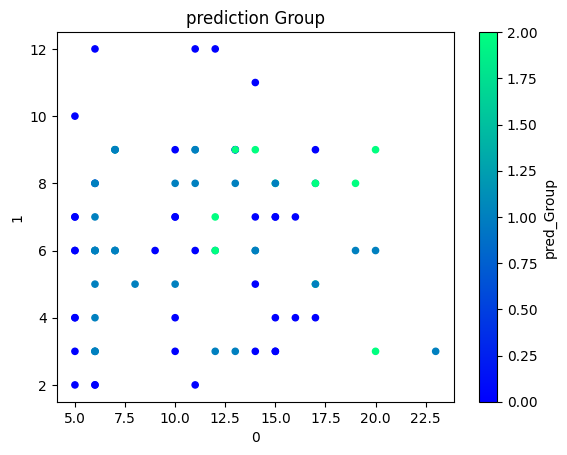

In [9]:
test_df.plot(kind="scatter", x=0, y=1, c="Group", cmap="winter")
plt.title("true Group")

test_df.plot(kind="scatter", x=0, y=1, c="pred_Group", cmap="winter")
plt.title("prediction Group")